In [235]:
import numpy as np

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [236]:
X, y = make_regression(n_samples=100, n_features=2, noise=5, random_state=42)

In [237]:
y = y.reshape((-1, 1))

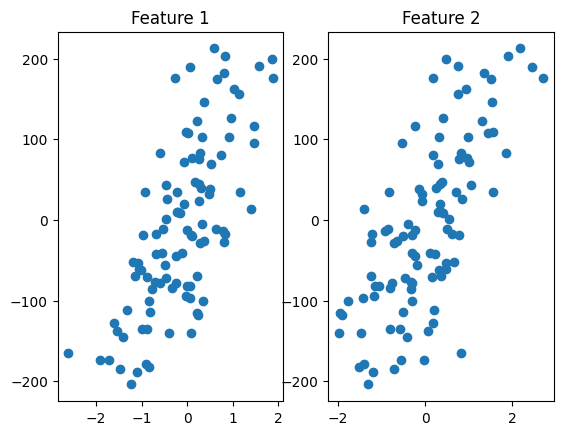

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X[:, 0], y)
ax1.set_title("Feature 1")
ax2.scatter(X[:, 1], y)
ax2.set_title("Feature 2")
plt.show()

In [ ]:
class AdalineSGD:
    def __init__(self, lr, epochs, shuffle):
        self.lr = lr
        self.epochs = epochs
        self.shuffle = shuffle

    def init_params(self, n_in, n_out):
        self.W = np.random.rand(n_in, n_out) * 0.01
        self.b = np.zeros((n_out, 1))
    
    def model(self, X, W, b):
        return X @ W + b
    
    def activation(self, Z):
        return Z
    
    def update_weights(self, xi, yi, y_hat):
        diff = yi - y_hat
        self.W += self.lr * 2.0 * xi.T * diff
        self.b += self.lr * 2.0 * diff

        loss = diff ** 2
        
        return loss
    
    def fit(self, X, y):
        n_in, n_out = X.shape[1], y.shape[1]
        self.init_params(n_in, n_out)
        self.losses = []

        for e in range(self.epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            
            local_loss = []
            for xi, yi in zip(X, y):
                out = self.model(xi, self.W, self.b)
                Z = self.activation(out)
            
                loss = self.update_weights(xi.reshape(-1, xi.shape[0]), yi, Z)
                local_loss.append(loss)

            self.losses.append(np.mean(local_loss))
        
        return self

    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    

In [240]:
ada_sgd = AdalineSGD(lr=0.01, epochs=1000, shuffle=True).fit(X, y)

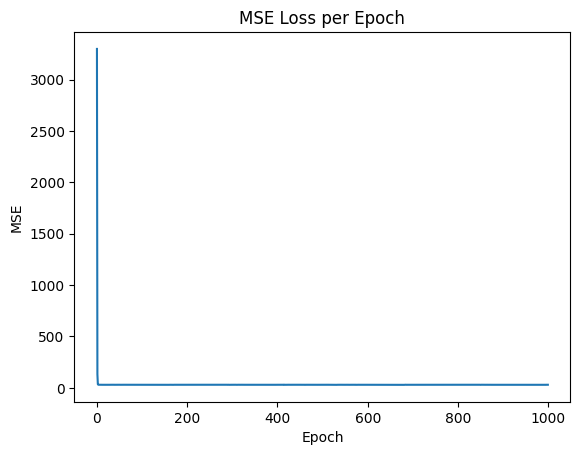

In [247]:
plt.plot(ada_sgd.losses)
plt.title("MSE Loss per Epoch")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()

In [242]:
x_plot = np.linspace(X.min(), X.max(), 100)
y_line = ada_sgd.W[0] * x_plot + ada_sgd.b[0]

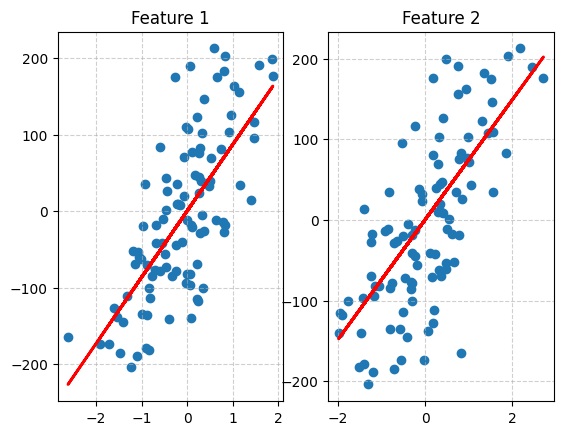

In [243]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X[:, 0], y)
ax1.set_title("Feature 1")
ax1.plot(
    X[:, 0],
    X[:, 0] * ada_sgd.W[0, 0] + ada_sgd.b[0, 0],
    color='red',
    linewidth=2
)
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.scatter(X[:, 1], y)
ax2.set_title("Feature 2")
ax2.plot(
    X[:, 1],
    X[:, 1] * ada_sgd.W[1, 0] + ada_sgd.b[0, 0],
    color='red',
    linewidth=2
)

ax2.grid(True, linestyle='--', alpha=0.6)
plt.show()

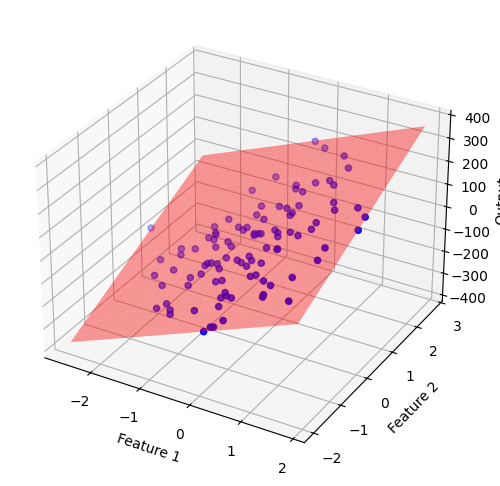

In [244]:
w1 = ada_sgd.W[0, 0]
w2 = ada_sgd.W[1, 0]
b  = ada_sgd.b[0, 0]

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)

X1, X2 = np.meshgrid(x1, x2)
Y = w1 * X1 + w2 * X2 + b

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y.ravel(), c='blue')
ax.plot_surface(X1, X2, Y, alpha=0.4, color='red')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Output')

plt.show()
